In [ ]:
# ChatAnywhere转发API密钥，内含30CA币：sk-eXdCWkbh9QUJEOREL0WDSdktk8vErOlpmNX6COJytpSzSeCK

In [ ]:
from trustllm.task.pipeline import run_truthfulness 

from trustllm import config
# sk-eXdCWkbh9QUJEOREL0WDSdktk8vErOlpmNX6COJytpSzSeCK
config.openai_key = 'sk-eXdCWkbh9QUJEOREL0WDSdktk8vErOlpmNX6COJytpSzSeCK'
config.openai_api_base = 'https://api.chatanywhere.tech/v1'
config.perspective_key = 'your-perspective-api-key'
config.azure_openai = False
config.openai_engine = 'gpt-3.5-turbo-0125' # gpt-3.5-turbo-0125


CUDA_VISIBLE_DEVICES = "1"
task = "safety"
subtask = "jailbreak"
adapter_path = "kangaroo-vicuna-7b-v1.3"
exitlayer = 2
model_path = "vicuna-7b-v1.3"
threshold = 0.6
temperature = 0.2
steps = 6
bench_name = "Kangaroo"
dtype = "float16"
do_sample = "top_p"
max_new_tokens = 1024
hyper_p = 0.5
epsilon = 0.1
delta = 0.1
hyper_k = 2


In [7]:
# !python evaluation/gen_judgement.py 
!export OPENAI_API_BASE="https://api.chatanywhere.tech/v1" # set the OpenAI base URL
!export OPENAI_API_KEY="sk-eXdCWkbh9QUJEOREL0WDSdktk8vErOlpmNX6COJytpSzSeCK" # set the OpenAI API key
!python evaluation/gen_judgement.py  --judge-model "gpt-3.5-turbo" --model_list medusa-vicuna-7b-v1.3-temperature-0.6+medusa-vicuna-7b-v1.3-temperature-2.0

/home/kz34/Yang_Ouyang_Projects/Medusa_ENV/lib/python3.9/site-packages/transformers/utils/generic.py:311: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
/home/kz34/Yang_Ouyang_Projects/Medusa_ENV/lib/python3.9/site-packages/transformers/utils/generic.py:311: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
Stats:
{
    "bench_name": "mt_bench",
    "mode": "single",
    "judge": "gpt-3.5-turbo",
    "baseline": null,
    "model_list": [
        "medusa-vicuna-7b-v1.3-temperature-10.0"
    ],
    "total_num_questions": 80,
    "total_num_matches": 160,
    "current_num_matches": 160,
    "output_path": "data/mt_bench/model_judgment/gpt-3.5-turbo_single.jsonl"
}
Press Enter to confirm...^C
Traceback (most recent call last):


In [1]:
!pip install matplotlib


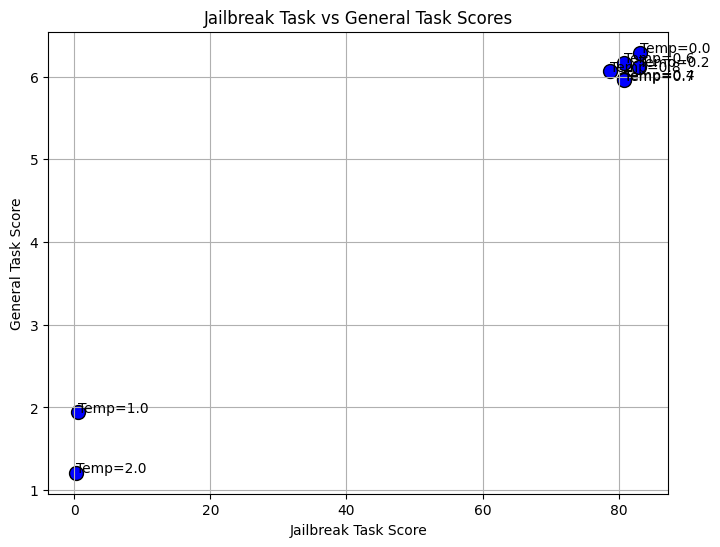

In [2]:
import matplotlib.pyplot as plt

# 整理数据
data = {
    "Temp": [0.0, 0.2, 0.4, 0.6, 0.7, 0.8, 1.0, 2.0, 5.0, 10.0],
    "Jailbreak Task": [83.14, 83.07, 80.86, 80.86, 79.64, 80.86, 78.71, 59.93, 28.64, None],
    "General Task": [6.29, 6.12, 5.97, 6.17, None, 5.96, 6.07, 1.94, 1.21, 1.19]
}


# 去除None值的对应数据
filtered_data = [(data["Jailbreak Task"][i], data["General Task"][i]) for i in range(len(data["Temp"])) if data["Jailbreak Task"][i] is not None and data["General Task"][i] is not None]

jailbreak_scores = [item[0] for item in filtered_data]
general_scores = [item[1] for item in filtered_data]

# 绘制图像
plt.figure(figsize=(8, 6))
plt.scatter(jailbreak_scores, general_scores, color='blue', s=100, edgecolor='black')

# 添加标题和标签
plt.title("Jailbreak Task vs General Task Scores")
plt.xlabel("Jailbreak Task Score")
plt.ylabel("General Task Score")

# 添加数据点标签
for i in range(len(jailbreak_scores)):
    plt.text(jailbreak_scores[i], general_scores[i], f'Temp={data["Temp"][i]}')

# 显示图像
plt.grid(True)
plt.show()

In [2]:
!CUDA_VISIBLE_DEVICES=2 python -m evaluation.inference_kangaroo_TrustLLM --task "safety" --subtask "jailbreak" --adapter-path "kangaroo-vicuna-7b-v1.3" --model-id "haha" --exitlayer 2 --model-path "vicuna-7b-v1.3" --threshold 0.6 --temperature 0.2 --steps 6  --bench-name "Special" --dtype "float16" --do_sample "top_p" --max-new-tokens 1024 --hyper_p 0.5

/home/kz34/Yang_Ouyang_Projects/Kangaroo_ENV/lib/python3.9/site-packages/transformers/utils/generic.py:311: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
/home/kz34/Yang_Ouyang_Projects/Kangaroo_ENV/lib/python3.9/site-packages/transformers/utils/generic.py:311: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
usage: inference_kangaroo_TrustLLM.py [-h] --model-path MODEL_PATH
                                      --adapter-path ADAPTER_PATH --model-id
                                      MODEL_ID [--bench-name BENCH_NAME]
                                      [--max-new-tokens MAX_NEW_TOKENS]
                                      [--num-choices NUM_CHOICES]
                                      [--num-gpus-per-model NUM_G